# **Visualization of a document corpus**

**Number of documents:** 1500

**Number of distinct words:** 12 419

**Sum of all words in original documents:** 1.9 mil

**Sum of words after reduction:** 746 316

In [8]:
# !pip install umap-learn
import numpy as np
import pandas as pd
import os
import umap
import matplotlib.pyplot as plt

color_seq = ['#E2E2E2', '#AA0DFE', '#3283FE', '#85660D', '#782AB6', '#1C8356', '#16FF32', '#F7E1A0', '#1CBE4F',
             '#C4451C', '#DEA0FD', '#FE00FA', '#325A9B', '#FEAF16', '#F8A19F', '#90AD1C', '#F6222E', '#1CFFCE',
             '#2ED9FF', '#B10DA1', '#C075A6', '#FC1CBF', '#B00068', '#FBE426', '#FA0087']

## Notes to think about before starting, but also after analysis
- Files contain words in different languages (german, english) - Do we want to reduce it to just one language?
- 

## Document load and reorganization of the data

### Data load

##### Load vocabulary

In [9]:
vocab = []
with open("vocab_nips.txt", "r") as f:
  for word in f:
    vocab.append(word.rstrip())

vocab = np.array(vocab, dtype=object)
vocab

array(['a2i', 'aaa', 'aaai', ..., 'zur', 'zurich', 'zwislocki'],
      dtype=object)

##### Load bag of words into matrix

In [10]:
count_hot = None
one_hot = None

with open("docword_nips.txt") as f:
  doc_count = int(f.readline())
  word_count = int(f.readline())
  count_hot = np.zeros((doc_count,word_count), dtype=np.int16)
  one_hot = np.zeros((doc_count,word_count), dtype=np.int16)
  next(f)
  for line in f.readlines():
    docID, wordID, count = line.rstrip().split(" ")
    count_hot[int(docID) - 1,  int(wordID) - 1] = int(count)
    one_hot[int(docID) - 1,  int(wordID) - 1] = 1
# count_hot

##### Check appearances of words and their counts

In [11]:
print("max: ", count_hot.max())
print("sum row: ", np.sort(one_hot.sum(axis=1)))
print("sum: col: ", np.sort(one_hot.sum(axis=0)))
# print(count_hot)
print(count_hot.max(axis=0))

count_zero = count_big = 0
print("length: ", len(one_hot.sum(axis=0)))
for i in one_hot.sum(axis=0):
  if i == 0:
    count_zero += 1
  elif i > 100:
    count_big += 1
  

print("zeros: ", count_zero, " count_big: ", count_big)

max:  132
sum row:  [  2   2   3 ... 816 906 914]
sum: col:  [   0    0    0 ... 1408 1424 1455]
[ 4  4  3 ...  4  3 15]
length:  12419
zeros:  44  count_big:  1783


### Visualization

##### Visualize count_hot

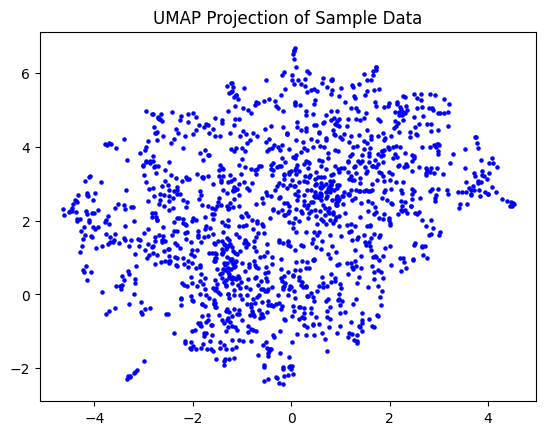

In [12]:
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2)
embedding = umap_model.fit_transform(count_hot)

plt.scatter(embedding[:, 0], embedding[:, 1], c='blue', s=5)
plt.title('UMAP Projection of Sample Data')
plt.show()

##### Visualization of one_hot

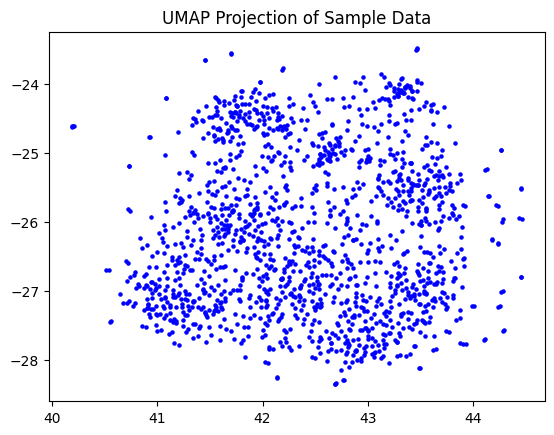

In [13]:
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.01, n_components=2, n_epochs=10000)
embedding = umap_model.fit_transform(one_hot)
plt.scatter(embedding[:, 0], embedding[:, 1], c='blue', s=5)
plt.title('UMAP Projection of Sample Data')
plt.show()

#### Column Reduction

In [14]:
print("sum row: ", np.sort(one_hot.sum(axis=1)))
print("sum: col: ", np.sort(one_hot.sum(axis=0)))

distinct_word_count = one_hot.sum(axis=1)
file_appearances = one_hot.sum(axis=0)
min_word_appear = 150
max_file_appear = 550
min_file_appear = 5


counter = 0
small_count = 0
for i in distinct_word_count:
  counter += 1
  if i < min_word_appear:
    print("row: ", counter, " number of distinct words: ", i)
    small_count += 1
print(small_count)

sum row:  [  2   2   3 ... 816 906 914]
sum: col:  [   0    0    0 ... 1408 1424 1455]
row:  82  number of distinct words:  110
row:  83  number of distinct words:  119
row:  1089  number of distinct words:  3
row:  1104  number of distinct words:  2
row:  1120  number of distinct words:  3
row:  1139  number of distinct words:  3
row:  1179  number of distinct words:  2
row:  1183  number of distinct words:  5
row:  1188  number of distinct words:  4
row:  1199  number of distinct words:  3
row:  1217  number of distinct words:  4
11


Almost all the small files contain word with id 8008 = "part", but other afre different.

In [15]:
new_one_hot = None
row_idx = []
col_idx = []

for i in range(len(distinct_word_count)):
  # row_idx.append(i)
  if distinct_word_count[i] > min_word_appear:
    row_idx.append(i)

for i in range(len(file_appearances)):
  if file_appearances[i] < max_file_appear and file_appearances[i] > min_file_appear:
    col_idx.append(i)

In [16]:
fin_one_hot = one_hot[row_idx, :]
fin_one_hot = fin_one_hot[:, col_idx]
print(fin_one_hot.shape)

fin_count_hot = count_hot[row_idx, :]
fin_count_hot = fin_count_hot[:, col_idx]
print(fin_count_hot.shape)

(1489, 10174)
(1489, 10174)


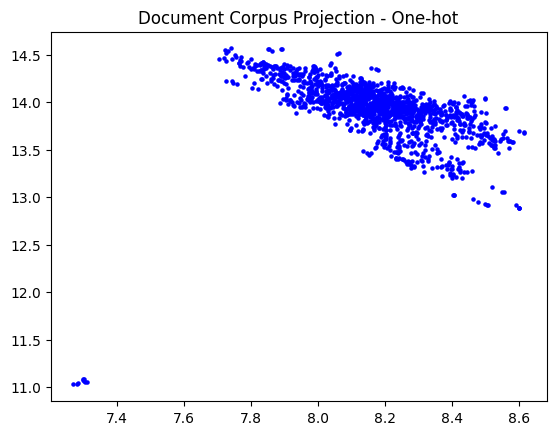

In [17]:
umap_model = umap.UMAP(n_neighbors=6, min_dist=0.1, n_components=20, n_epochs=1000)
embedding = umap_model.fit_transform(fin_one_hot)
plt.scatter(embedding[:, 0], embedding[:, 1], c='blue', s=5)
plt.title('Document Corpus Projection - One-hot')
plt.show()

C:\Users\jzilt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


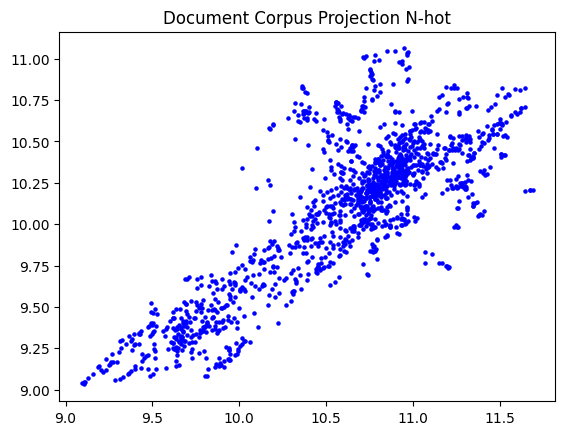

In [18]:
umap_model = umap.UMAP(n_neighbors=6, min_dist=0.1, n_components=20, n_epochs=1000, random_state=42)
embedding = umap_model.fit_transform(fin_count_hot)
plt.scatter(embedding[:, 0], embedding[:, 1], c='blue', s=5)
plt.title('Document Corpus Projection N-hot')
plt.show()

C:\Users\jzilt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


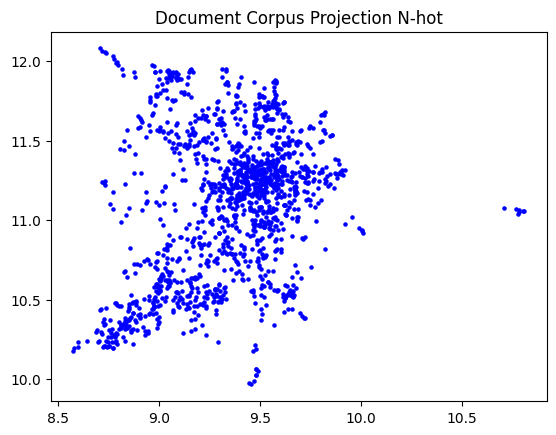

In [19]:
min_word_appear = 150
max_file_appear = 350
min_file_appear = 5

umap_model = umap.UMAP(n_neighbors=6, min_dist=0.1, n_components=20, n_epochs=1000, random_state=22)
embedding = umap_model.fit_transform(fin_count_hot)
plt.scatter(embedding[:, 0], embedding[:, 1], c='blue', s=5)
plt.title('Document Corpus Projection N-hot')
plt.show()

In [21]:
umap.UMAP(n_neighbors=15,
                     # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
                     n_components=5,  # default 2, The dimension of the space to embed into.
                     metric='euclidean',
                     # default 'euclidean', The metric to use to compute distances in high dimensional space. Manhatan, consin
                     # n_epochs=1000,
                     # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings.
                     learning_rate=1.0,  # default 1.0, The initial learning rate for the embedding optimization.
                     init='spectral',
                     # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
                     min_dist=0.1,  # default 0.1, The effective minimum distance between embedded points.
                     spread=1,
                     # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
                     low_memory=False,
                     # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
                     set_op_mix_ratio=1.0,
                     # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
                     local_connectivity=1,
                     # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
                     repulsion_strength=1.0,
                     # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
                     negative_sample_rate=5,
                     # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
                     transform_queue_size=4.0,
                     # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
                     a=None,
                     # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
                     b=None,
                     # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
                     random_state=42,
                     # default: None, If int, random_state is the seed used by the random number generator;
                     metric_kwds=None,
                     # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
                     angular_rp_forest=False,
                     # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
                     target_n_neighbors=-1,
                     # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
                     # target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different.
                     # target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
                     # target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
                     transform_seed=42,
                     # default 42, Random seed used for the stochastic aspects of the transform operation.
                     verbose=False,  # default False, Controls verbosity of logging.
                     unique=False,
                     # default False, Controls if the rows of your data should be uniqued before being embedded.
                     )

UMAP(local_connectivity=1, low_memory=False, n_components=5, random_state=42, spread=1)

# Other testing


In [31]:
number_of_files_to_appear_in = 10
number_of_words_to_keep = 75


column_sums = one_hot.sum(axis=0)

# Find columns where the sum is under 10
columns_to_keep = column_sums >= number_of_files_to_appear_in

# Filter count_hot and one_hot arrays based on columns to keep
count_hot_filtered = count_hot[:, columns_to_keep]
one_hot_filtered = one_hot[:, columns_to_keep]

# Update the vocab list to include only the words corresponding to columns to keep
vocab_filtered = vocab[columns_to_keep]

# Print the shapes to confirm the dimensions
print("Original count_hot shape:", count_hot.shape)
print("Filtered count_hot shape:", count_hot_filtered.shape)

print("Original one_hot shape:", one_hot.shape)
print("Filtered one_hot shape:", one_hot_filtered.shape)

print("Original vocab length:", len(vocab))
print("Filtered vocab length:", len(vocab_filtered))


for i in range(count_hot_filtered.shape[0]):
  row = count_hot_filtered[i]
  sorted_args = np.argsort(row)[::-1]
  top_args = sorted_args[:number_of_words_to_keep]
  count_hot_filtered[i, number_of_words_to_keep:] = 0
  one_hot_filtered[i, number_of_words_to_keep:] = 0


Original count_hot shape: (1500, 12419)
Filtered count_hot shape: (1500, 8392)
Original one_hot shape: (1500, 12419)
Filtered one_hot shape: (1500, 8392)
Original vocab length: 12419
Filtered vocab length: 8392


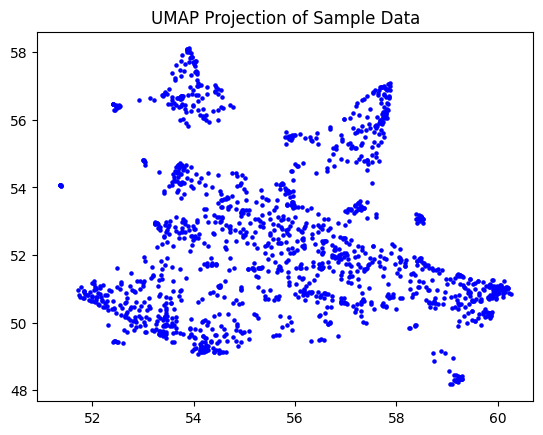

In [32]:
umap_model = umap.UMAP(n_neighbors=20, min_dist=0.1, n_components=2, n_epochs=5000)
embedding = umap_model.fit_transform(count_hot_filtered)
plt.scatter(embedding[:, 0], embedding[:, 1], c='blue', s=5)
plt.title('UMAP Projection of Sample Data')
plt.show()

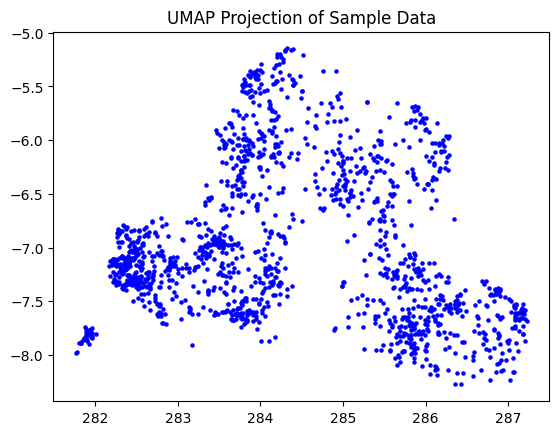

In [33]:
umap_model = umap.UMAP(n_neighbors=25, min_dist=0.1, n_components=5, n_epochs=10000)
embedding = umap_model.fit_transform(one_hot_filtered)
plt.scatter(embedding[:, 0], embedding[:, 1], c='blue', s=5)
plt.title('UMAP Projection of Sample Data')
plt.show()

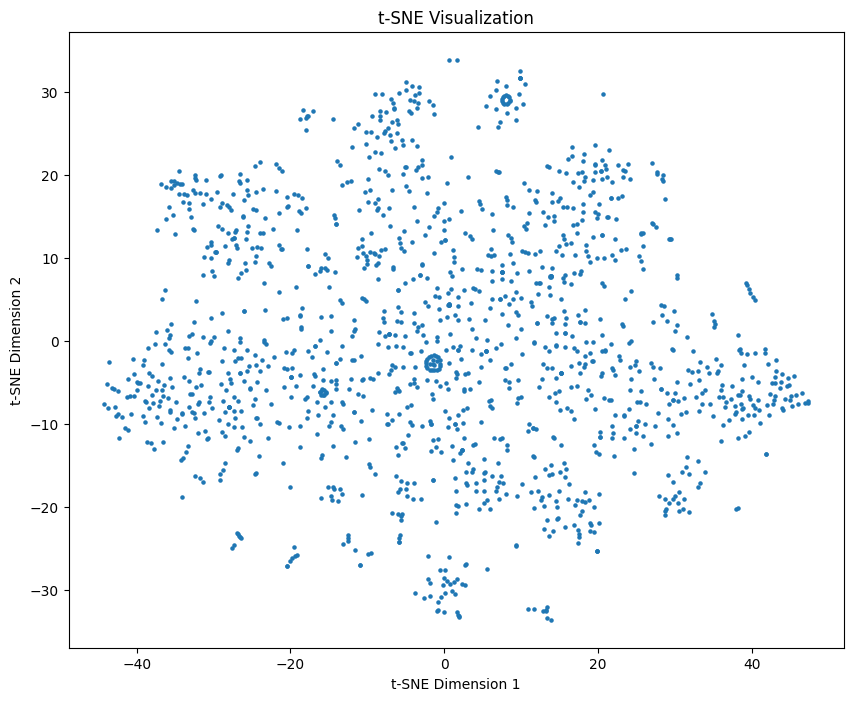

In [38]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Your code for loading data and populating count_hot and one_hot arrays goes here

# Apply t-SNE to the filtered count_hot array
tsne = TSNE(n_components=2, random_state=42)
count_hot_embedded = tsne.fit_transform(count_hot_filtered)

# Visualize the embedded data
plt.figure(figsize=(10, 8))
plt.scatter(count_hot_embedded[:, 0], count_hot_embedded[:, 1], s=5)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()